<a href="https://colab.research.google.com/github/SimranTrivedi/Projects/blob/main/IBM_Telco_customer_churn_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
from google.colab import files
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
print("Shape of dataset:", df.shape)
df.info()

Shape of dataset: (7043, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBill

In [6]:
df.describe()
for col in df.columns:
    print(f"{col}: {df[col].unique()[:5]}")

customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' '7795-CFOCW' '9237-HQITU']
gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
tenure: [ 1 34  2 45  8]
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 42.3  70.7 ]
TotalCharges: ['29.85' '1889.5' '108.15' '1840.75' '151.65']
Churn: ['No' 'Yes']


In [7]:
df['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


Text(0.5, 1.0, 'Churn Distribution')

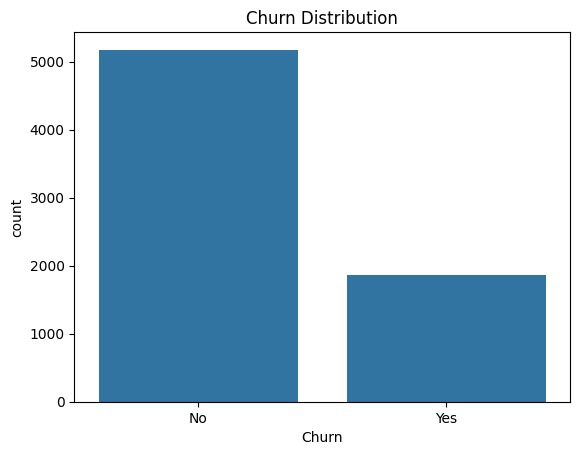

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")

In [9]:
df.drop("customerID", axis=1, inplace=True)

In [10]:
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [11]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())


In [12]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [13]:
df.select_dtypes(include='object').columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [14]:
df = pd.get_dummies(df, drop_first=True)

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [16]:
X = df.drop('Churn', axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [18]:
y_pred = model.predict(X_test)

In [ ]:
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

Classification Report:

              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1036
           1       0.64      0.46      0.54       373

    accuracy                           0.79      1409
   macro avg       0.73      0.68      0.70      1409
weighted avg       0.78      0.79      0.78      1409



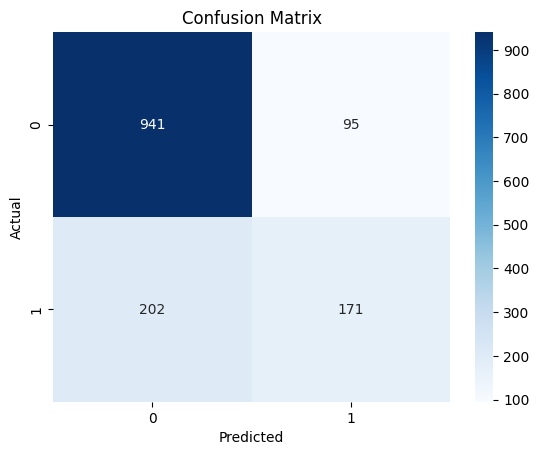

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [20]:
churn_prob = model.predict_proba(X_test)[:, 1]
risk_df = X_test.copy()
risk_df['Churn_Probability'] = churn_prob
risk_df['Actual_Churn'] = y_test.values


In [21]:
top_churners = risk_df.sort_values('Churn_Probability', ascending=False).head(10)
top_churners


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Probability,Actual_Churn
5782,1,1,69.65,69.65,False,False,False,True,False,False,...,False,False,False,False,True,False,True,False,1.00,1
6933,0,1,69.60,69.60,True,False,False,True,False,False,...,False,False,False,False,True,False,True,False,1.00,1
4800,1,1,94.00,94.00,True,False,False,True,False,True,...,False,True,False,False,True,False,True,False,0.99,1
5640,0,1,79.60,79.60,True,False,False,True,False,False,...,False,True,False,False,False,False,True,False,0.99,1
3346,1,2,84.05,186.05,False,False,False,True,False,True,...,False,True,False,False,True,False,True,False,0.98,0
5872,0,1,69.65,69.65,False,False,True,True,False,False,...,False,False,False,False,True,False,True,False,0.98,1
970,0,1,90.55,90.55,False,False,False,True,False,False,...,False,True,False,False,False,False,True,False,0.98,1
6633,0,1,74.50,74.50,False,False,False,True,False,True,...,False,False,False,False,True,False,True,False,0.97,1
2275,0,1,74.50,74.50,True,True,True,True,False,True,...,False,False,False,False,True,False,True,False,0.97,1
1410,1,2,93.85,170.85,False,False,False,True,False,True,...,False,True,False,False,True,False,True,False,0.96,1


In [24]:
high_risk_customers = risk_df[risk_df['Churn_Probability'] > 0.75]
num_high_risk = len(high_risk_customers)
monthly_revenue_per_customer = 1000
estimated_loss = monthly_revenue_per_customer * num_high_risk
estimated_gain = estimated_loss * 0.3
print(f" Customers likely to churn (prob > 0.75): {num_high_risk}")
print(f" Potential monthly revenue lost: ₹{estimated_loss}")
print(f" Revenue recovered if 30% are retained: ₹{estimated_gain}")


 Customers likely to churn (prob > 0.75): 100
 Potential monthly revenue lost: ₹100000
 Revenue recovered if 30% are retained: ₹30000.0
